In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Formule de la fonction sigmoide. 

$$g(z)=\frac{1}{1+e^{-z}}$$

### Notes : 
Dans le cadre de la régression logistique, $z$ est le résultat d'un modèle de regression linéaire : 
- dans le cas d'un set à un exemple, $z$ est un nombre entier (scalar)
- dans le cas d'exemple multiple, $z$ peut être un vecteur $\vec{z}\ $ a   $\ m$ valeurs, un pour chaque exemple. 
- lors de l'implementation en python, faire en sorte de couvrir les deux situations.

## Formule de la Regression Logistique


$$ 


f_{W,b}(X^{(i)}) =g(W\cdot X^{(i)} + b )
\\
où \\
\\
g(z)=\frac{1}{1+e^{-z}} \\
Soit \\
f_{\vec{W}, b}( \vec{X} )=g(\vec{W}\cdot\vec{X} + b) = \frac{1}{1+e^{-(\vec{W}\cdot \ \vec{X} + b)}}\\
= P(y= 1|x;\vec{w}, b)
$$

On peut exprimer ici $f(x)$ est la probabilité que y soit égale a 1, exprimé en pourcentage. 
Soit si $y=0.3$, y a 30% de chance d'être positif (1) et donc 70% de chance d'être négatif.
On peut appliquer un marqueur à 50%, qui permet de dire : 
$$
Is \ f_{\vec{W},b}\geq 0.5 ? \\
Yes : \ \hat{y} = 1\\
No : \ \hat{y} = 0\\
$$

## Decision Boundary : 

Comment pouvons nous déduire un Yes / No, ou True / False ? 
Si on regarde la sigmoide : 

Text(0, 0.5, 'sigmoid(z)')

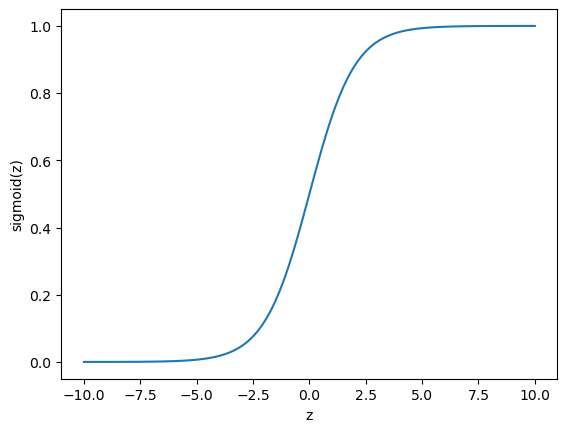

In [2]:
z = np.linspace(-10, 10, 100) 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

a = sigmoid(z)
plt.plot(z, a) 
plt.xlabel("z") 
plt.ylabel("sigmoid(z)")

On peut se demander : 

Quand $\ f_{\vec{W},b}$ est-il $\geq 0.5 $?
$$
g(z)\geq 0.5\\
z\geq 0\\
Donc : \\
Quand \\ W\cdot X^{(i)} + b \geq 0\\
Alors \\
\hat{y} = 1
$$

La "Decision boundary" est la ligne représenté par l'équation $$ z = \vec{W}\cdot\vec{X}+b = 0 $$ 
C'est valable pour les cas où la decision boundary est effectivement une fonction linéaire. 

L'utilisation de polynomials dans la regression logistique permet d'avoir des decision boundary non linéaires. 

# Cost Function pour la régression logistique 

La squared error cost function de la regression linéaire n'est pas la cost function idéale pour la régression logistique. 
Car la cost function J, soit $J_{(\vec{w},b)} = \frac{1}{2m}\sum_{i-0}^{m}(f_{(\vec{w},b)}(\vec{X}^{(i)})-y^{(i)})^2 $ est une fonction convexe qui permet l'utilisation de gradient descent jusqu'a la convergence. Or la squared error cost fonction de la regression logitique est non convexe. 

> NB : On utilise le terme Loss pour la différence entre une prédiction et sa cible sur un exemple, et le terme Cost pour la mesure des losses sur le training set.



## Loss Function : 


$$
L(f_{\vec{w},b}(\vec{X}^{(i)}),y^{(i)}) = \left\{
  \begin{array}{ll}
    -\log(f_{\vec{w},b}(\vec{X}^{(i)})) & \text{if $y=1$} \\
    -\log(1-f_{\vec{w},b}(\vec{X}^{(i)})) & \text{if $y=0$}
  \end{array}
\right.
$$

Soit la cost function suivante : 

$$
J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}L(f_{\vec{w},b}(\vec{X}^{(i)}),y^{(i)}) \\
$$

On admet que cette fonction est convexe et que l'on peut atteindre un minimum global, et donc utiliser Gradient Descent

## Simplified Cost Function for Logistic Regression

Pour pourvoir accepter que y soit soit 0 soit 1 et utiliser qu'une seule équation, on doit reformuler la loss function ainsi : 

$$
L(f_{\vec{w},b}(\vec{X}^{(i)}),y^{(i)}) = 

    -y^{(i)}\log(f_{\vec{w},b}(\vec{X}^{(i)}))
    -(1-y^{(i)})\log(1-f_{\vec{w},b}(\vec{X}^{(i)})) 


$$

Pour finir on peut écrire la cost function J en sortant le signe négatif et en intégrant la loss function simplifiée ainsi : 

$$
J(\vec{W},b) = -\frac{1}{m}\sum_{i=1}^{m}    \ [ \ y^{(i)}\log(f_{\vec{w},b}(\vec{X}^{(i)}))+(1-y^{(i)})\log(1-f_{\vec{w},b}(\vec{X}^{(i)})) \ ]

$$

Cette cost function vient des statistiques : maximum likelihood. 

# Gradient Descent for Logistic Regression
repeat {
$$
w_j = w_j - a[\ \frac{1}{m}\sum_{i=0}^{m}\ (f_{\vec{w},b}(\vec{X}^{(i)})-y^{(i)})x_j^{(i)}] \\
b = b - a[\ \frac{1}{m}\sum_{i=0}^{m}\ (f_{\vec{w},b}(\vec{X}^{(i)})-y^{(i)})] \\ 
\text{où $f_{\vec{W}, b}( \vec{X} )= \frac{1}{1+e^{-(\vec{W}\cdot \ \vec{X} + b)}}\\ $}
$$
}
avec mises à jour simultanées de w et b